In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.decomposition import PCA
from scipy.stats import zscore

In [49]:
# Read the dataset

VehicleDf = pd.read_csv("vehicle.csv")  
VehicleDf.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [50]:
# Check the class distribution

VehicleDf["class"].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

In [51]:
VehicleDf.index

RangeIndex(start=0, stop=846, step=1)

In [52]:
#Explore the data
VehicleDf.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,846.000000,841.000000,842.000000,840.000000,844.000000,846.000000,845.000000,845.000000,843.000000,846.000000,843.000000,844.000000,844.000000,842.000000,840.000000,845.000000,845.000000,846.000000
mean,93.678487,44.828775,82.110451,168.888095,61.678910,8.567376,168.901775,40.933728,20.582444,147.998818,188.631079,439.494076,174.709716,72.447743,6.364286,12.602367,188.919527,195.632388
std,8.234474,6.152172,15.778292,33.520198,7.891463,4.601217,33.214848,7.816186,2.592933,14.515652,31.411004,176.666903,32.584808,7.486190,4.920649,8.936081,6.155809,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,318.000000,149.000000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,363.500000,173.500000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [5]:
#From the describe output we see the column values are normally distributed if observed the mean and median for each feature.
#The Scaled_variance.1 feature seems to be skewed as the median is less than mean. We can plot the scatterplot to check.

In [53]:
#Check datatype
VehicleDf.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [54]:
#Check for null values.
VehicleDf.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [55]:
#Using fillna to fill mean values of those columns.
VehicleDf.fillna(VehicleDf.mean(),inplace=True)

In [56]:
#Check for null values to verify
VehicleDf.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

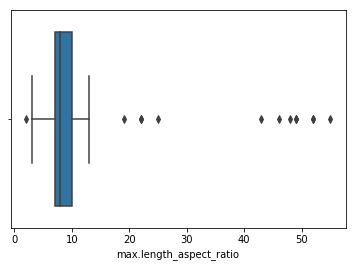

In [42]:
#Checking for outliers as from the desc output we see that the max values for columns are skewed towards right. There seems 
#to be outliers issues. 
#following are few boxplots to show the outliers.
#We will fix outliers using quartiles


sns.boxplot(VehicleDf["max.length_aspect_ratio"])

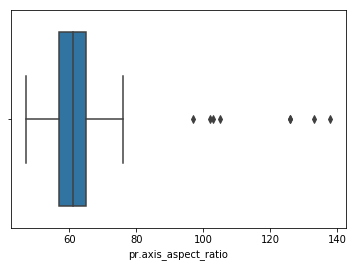

In [43]:
sns.boxplot(VehicleDf["pr.axis_aspect_ratio"])

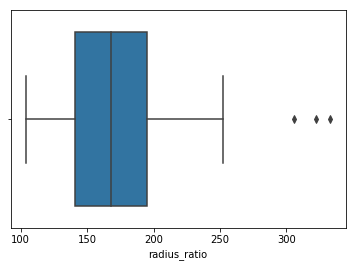

In [44]:
sns.boxplot(VehicleDf["radius_ratio"])

In [58]:
#Use Interquartile ranges to remove outliers.

Y=pd.DataFrame(VehicleDf["class"])
X=VehicleDf.drop("class",axis=1) #Removing class as it is dependent variable


Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

XX = X[~((X < (Q1 - 1.5 * IQR)) |(X > (Q3 + 1.5 * IQR))).any(axis=1)]


In [59]:
Y.index

RangeIndex(start=0, stop=846, step=1)

In [60]:
XX.index

Int64Index([  0,   1,   2,   3,   5,   6,   7,   8,   9,  10,
            ...
            836, 837, 838, 839, 840, 841, 842, 843, 844, 845],
           dtype='int64', length=813)

In [61]:
#Using the class columns from original dataset back in the dataframe after outlier treatment
VehicleDf = pd.merge(XX, Y, left_index=True, right_index=True)

In [63]:
VehicleDf.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

In [64]:
VehicleDf.shape

(813, 19)

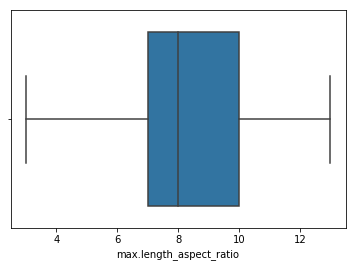

In [19]:
#Check the distribution of data in one of the column to check outliers now
sns.boxplot(VehicleDf["max.length_aspect_ratio"])

In [21]:
#check desc on dataframe
VehicleDf.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000
mean,93.612546,44.803375,82.165365,167.906923,61.183712,8.121771,168.902708,40.889217,20.580255,147.954490,187.965428,439.206627,174.376900,72.009583,6.179810,12.618207,188.985141,195.702337
std,8.059733,6.110408,15.538599,31.553159,5.626893,2.048352,32.778990,7.725113,2.553199,14.484462,30.292991,173.942579,32.379913,6.193784,4.633955,8.921914,6.112636,7.345952
min,73.000000,33.000000,40.000000,104.000000,47.000000,3.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,319.000000,149.000000,67.000000,2.000000,5.000000,185.000000,191.000000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.000000,365.000000,173.000000,71.000000,5.000000,11.000000,189.000000,197.000000
75%,100.000000,49.000000,98.000000,194.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,216.000000,586.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,116.000000,59.000000,112.000000,246.000000,76.000000,13.000000,262.000000,61.000000,28.000000,188.000000,288.000000,987.000000,268.000000,87.000000,19.000000,40.000000,204.000000,211.000000


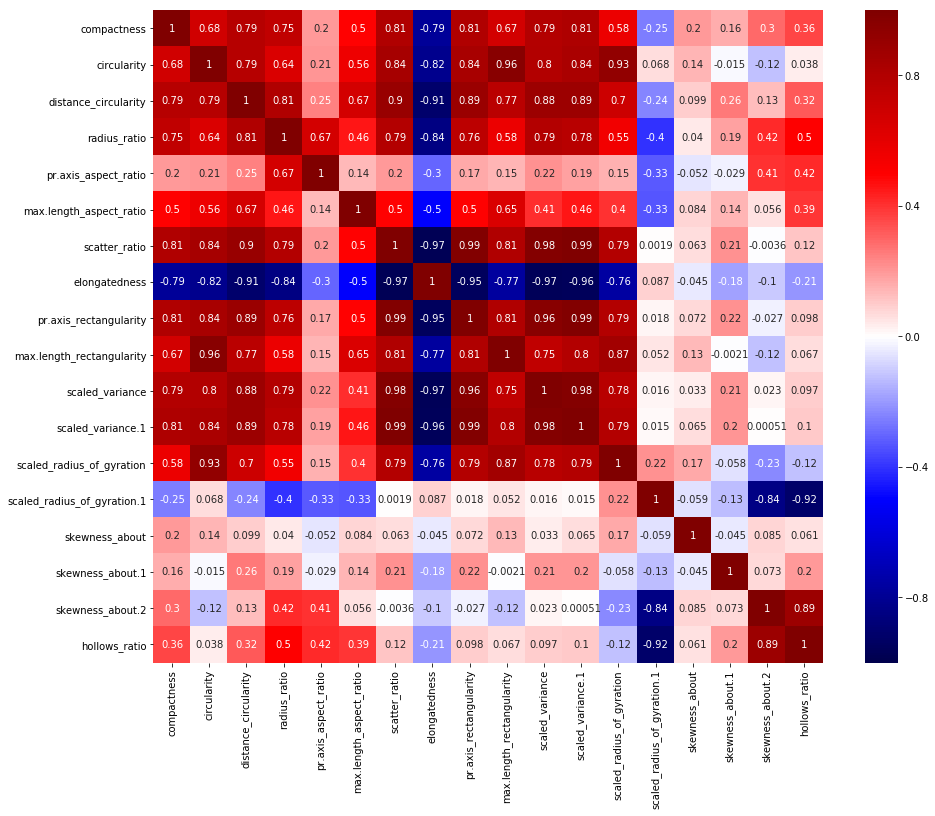

In [65]:
#heat map for correlation just to know the  quantified relation between the variable
#calculate the correlation matrix

corr = VehicleDf.corr()
fig, ax = plt.subplots()
fig.set_size_inches(15, 12)
sns.heatmap(corr, cmap='seismic', annot=True, vmax=1, vmin=-1)

In [23]:
# From the above correlation graph we see there are 5 distinct groups.

# 1. We seee Compactness, circularity, distance_circularity and radius_ratio features strong positively correlated 

# 2. pr.axis_rectangularity,max_length_rectangularity,scaled_variance,scaled_variance.1 and scaled_radius of gyration are other set positively correlated.

# 3. scater_ratio has strong correlation with both groups 1 and 2

# 4. elogatedness has strong negative correlation with both groups 1 and 2

# 5. There are remaining features which are not strongly correlated 

#  Based on above, we will keep the attributes from 1,2,3,4 groups as they will better explain variance in data in components.

In [67]:
X=VehicleDf[['compactness', 'circularity', 'distance_circularity', 'radius_ratio','scatter_ratio','elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity','scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration','hollows_ratio']]


In [68]:
# We transform (centralize) the entire X (independent variable data) to zscores through transformation. We will create the PCA dimensions
# on this distribution. 
sc = StandardScaler()
X_std =  sc.fit_transform(X)          
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00123153  0.68073816  0.78777938  0.74701014  0.81142806 -0.78941984
   0.81280957  0.6749966   0.79320585  0.81553989  0.57830746  0.36460894]
 [ 0.68073816  1.00123153  0.78848255  0.64180292  0.84508823 -0.81721674
   0.84286341  0.96305807  0.80431345  0.836247    0.9274137   0.03812789]
 [ 0.78777938  0.78848255  1.00123153  0.8093873   0.90597084 -0.90994146
   0.89599422  0.76978985  0.88572259  0.89068892  0.70354876  0.32136456]
 [ 0.74701014  0.64180292  0.8093873   1.00123153  0.79027729 -0.84541369
   0.76467624  0.57777733  0.79450485  0.77904494  0.55140379  0.5052516 ]
 [ 0.81142806  0.84508823  0.90597084  0.79027729  1.00123153 -0.97260018
   0.99025222  0.80729614  0.97834616  0.99503103  0.79525225  0.1159246 ]
 [-0.78941984 -0.81721674 -0.90994146 -0.84541369 -0.97260018  1.00123153
  -0.95119636 -0.770632   -0.96644083 -0.95831379 -0.76304779 -0.21114418]
 [ 0.81280957  0.84286341  0.89599422  0.76467624  0.99025222 -0.95119636
   1.00123

In [69]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n %s', eig_vecs)
print('\n Eigen Values \n %s', eig_vals)

Eigen Vectors 
 %s [[-2.76969503e-01 -2.18947920e-01  4.57876870e-02  8.24601158e-01
  -3.54742472e-01 -1.94592278e-01  1.08985978e-01  1.15771677e-01
   6.08395893e-02  2.42130666e-02 -2.96831577e-03 -4.26546382e-04]
 [-2.95669700e-01  2.11547712e-01 -4.36586414e-01 -3.86914496e-02
  -7.83414444e-02 -1.69849708e-02 -1.81451983e-01  4.43474891e-02
   2.94574871e-01 -7.34204751e-01  9.21700583e-02  8.86481505e-03]
 [-3.05103938e-01 -1.32656032e-01  1.13284675e-02 -9.42480733e-02
   5.53109511e-01 -7.10999280e-01  2.50244499e-01 -5.04451729e-02
   9.43090845e-03 -2.60068196e-02 -3.77294684e-02 -3.86909456e-02]
 [-2.71823938e-01 -3.54422694e-01  7.33969383e-02 -4.36987361e-01
  -5.71148629e-01 -3.20499659e-01 -3.58577528e-01 -1.76390492e-01
  -6.52608387e-02  1.05665346e-01 -9.84602834e-03  2.81290097e-03]
 [-3.21751266e-01  3.55666796e-02  2.08278585e-01 -2.74541985e-03
   1.22710835e-01  1.94325242e-01 -6.72137832e-02 -1.02145386e-01
   1.67389033e-01  3.52715932e-02 -3.99625738e-01  7.

In [70]:
print("Eigen Values:")
pd.DataFrame(eig_vals).transpose()

Eigen Values:


,0,1,2,3,4,5,6,7,8,9,10,11
0,9.311002,1.40631,0.555742,0.281309,0.17265,0.095511,0.094664,0.040179,0.022696,0.021594,0.009402,0.00372


In [71]:
# We will check the cumulative variance each components explaining.

tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 77.49624465  89.2010797   93.8265685   96.16792789  97.60490492
  98.3998507   99.18774578  99.52215862  99.71105775  99.89078315
  99.96903906 100.        ]


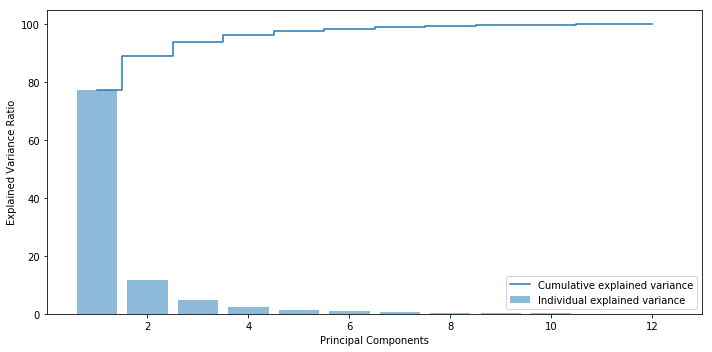

In [72]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

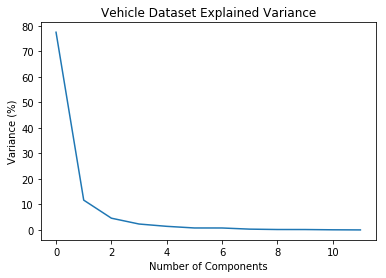

In [73]:
# Another plot - elbow plot
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(var_exp)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Vehicle Dataset Explained Variance')
plt.show()

In [31]:
# From above we see the first 4 principle components explain 95% variance of all data.

In [74]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)

principalComponents = pca.fit_transform(X_std)

In [75]:
principalDf = pd.DataFrame(data = principalComponents , columns = ['Component1', 'Component2','Component3','Component4'])
principalDf.head()

,Component1,Component2,Component3,Component4
0,0.194547,-0.025831,-1.077815,0.044573
1,-1.628171,0.433710,-0.312665,0.224045
2,3.787399,0.069852,0.213005,-0.073316
3,-1.870635,1.856103,-0.573752,0.364602
4,6.328421,-2.322327,2.220216,0.644386


In [76]:
# Use SVM and Grid search

In [79]:
#create data and sample
y=VehicleDf["class"]   #Class column is in original dataframe VehicleDf
X=principalDf       # We are using the PCA principal dimensions


test_size = 0.20 # taking 80:20 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [80]:

#Define parameters for grid search

params_to_search = [{'kernel': ['rbf'],'C': [ 0.01, 0.05, 0.5, 1]},
                    {'kernel': ['linear'], 'C': [ 0.01, 0.05, 0.5, 1]}]

In [81]:

# Build model using SVM and also use Crossvalidation CV=5

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

model = GridSearchCV(SVC(), param_grid=params_to_search, cv=5)

In [82]:
model.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['rbf'], 'C': [0.01, 0.05, 0.5, 1]}, {'kernel': ['linear'], 'C': [0.01, 0.05, 0.5, 1]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [83]:
model.best_score_

0.8123076923076923

In [84]:
#Which hyperparamter provided best score.

model.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [85]:
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, model.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.511 (+/-0.003) for {'C': 0.01, 'kernel': 'rbf'}
0.682 (+/-0.064) for {'C': 0.05, 'kernel': 'rbf'}
0.794 (+/-0.066) for {'C': 0.5, 'kernel': 'rbf'}
0.812 (+/-0.056) for {'C': 1, 'kernel': 'rbf'}
0.648 (+/-0.030) for {'C': 0.01, 'kernel': 'linear'}
0.723 (+/-0.053) for {'C': 0.05, 'kernel': 'linear'}
0.731 (+/-0.067) for {'C': 0.5, 'kernel': 'linear'}
0.728 (+/-0.068) for {'C': 1, 'kernel': 'linear'}


In [86]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        bus       0.83      0.81      0.82        37
        car       0.91      0.92      0.91        84
        van       0.90      0.90      0.90        42

avg / total       0.89      0.89      0.89       163

